## USED CAR PRICE ESTIMATION USING MACHINE LEARNING ALGORITHMS

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing 
- Data Transformation and Standardisation
- Model Training
- Choosing best model

#### 1. <u> PROBLEM STATEMENT </u>

This project estimates the actual price of the car based on its given features such as Brand, Kms Driven, Age, Seats, Mileage etc

#### 2. <u> DATA COLLECTION </u>

- The data was scraped from one of the genuine used car dealing company i.e., www.cardekho.com
- The car data was scraped for different areas across India to check whether the area also has the contribution towards the price.
- The data was scraped using python library __"selenium"__ to automate the process and stored into a csv file using __"pandas"__.

###### 2.1 IMPORTING DATA AND REQURIED PACKAGES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

Reading the csv file

In [ ]:
df = pd.read_csv('car_data.csv')

Displaying top 5 records

In [ ]:
df.head()

,Brand,Model,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement (in cc),Transmission,Mileage (in kmpl),Max Power (in bhp),Wheel Size,Registration Month,Registration Year,Price (in lacs),City,Car Location
0,Maruti,Ertiga VXI CNG,Third Party,CNG,7.0,51012.0,MH01,First Owner,1373.0,Manual,22.80,80.9,NaN,Jun,2015.0,7.04,Mumbai,NaN
1,Renault,KWID 1.0 RXT Opt,Third Party,Petrol,5.0,31782.0,TS07,First Owner,999.0,Manual,21.74,67.0,NaN,Jun,2020.0,4.70,Hyderabad,NaN
2,Hyundai,Verna 1.6 SX VTVT,Third Party insurance,Petrol,5.0,102028.0,KA04,First Owner,1591.0,Manual,17.01,121.3,16,Oct,2012.0,4.90,Bangalore,NaN
3,Ford,Aspire 1.2 Ti-VCT Titanium,Not Available,Petrol,5.0,27807.0,AS01,First Owner,1196.0,Manual,18.16,86.8,14,Sept,2017.0,3.96,Kolkata,NaN
4,Maruti,Vitara Brezza ZDi,Comprehensive,Diesel,5.0,60680.0,GJ01,First Owner,1248.0,Manual,24.30,88.5,16,Oct,2019.0,9.50,Ahmedabad,NaN


###### 2.2 DATASET 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11236 entries, 0 to 11235
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Brand                        11236 non-null  object 
 1   Insurance Validity           11205 non-null  object 
 2   Fuel Type                    11236 non-null  object 
 3   Seats                        11232 non-null  float64
 4   Kms Driven                   11229 non-null  float64
 5   Ownership                    11228 non-null  object 
 6   Engine Displacement (in cc)  11229 non-null  float64
 7   Transmission                 11236 non-null  object 
 8   Mileage (in kmpl)            10998 non-null  float64
 9   Max Power (in bhp)           11054 non-null  float64
 10  Wheel Size                   7095 non-null   object 
 11  Registration Month           10324 non-null  object 
 12  Registration Year            10324 non-null  float64
 13  Price (in lacs) 

From the above output, various attributes of the car can be seen

In [ ]:
df.shape

(11236, 15)

It is seen that the dataframe has 11,236 tuples with 15 attributes

#### 3. <u> DATA CHECKS TO PERFORM ON THE ATTRIBUTES </u>

1. Checking Attribute type
2. Check Data Types
3. Check Missing values
4. Check Duplicated values
5. Check the number of unique values of each column
6. Check statistics of data set
7. Check various categories present in the different categorical column

3.1 CHECKING ATTRIBUTES TYPE

In [ ]:
df.columns

Index(['Brand', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven',
       'Ownership', 'Engine Displacement (in cc)', 'Transmission',
       'Mileage (in kmpl)', 'Max Power (in bhp)', 'Wheel Size',
       'Registration Month', 'Registration Year', 'Price (in lacs)', 'City'],
      dtype='object')

From the above attributes, it can be classified into 3 types

- __NUMERICAL ATTRIBUTES__: Seats, Kms Driven, Engine Displacement (in cc), Mileage (in kmpl), Max Power (in bhp), Torque (in nm), Registration Month, Registration Year, 
- __NOMINAL CATEGORICAL ATTRIBUTES__: Fuel Type, Brand, Transmission, Wheel Size, Registration Month, City, 
- __ORDINAL CATEGORICAL ATTRIBUTES__: Ownership, Insurance Validity, 

3.2 CHECKING DATA TYPES

In [ ]:
df.dtypes

Brand                           object
Insurance Validity              object
Fuel Type                       object
Seats                          float64
Kms Driven                     float64
Ownership                       object
Engine Displacement (in cc)    float64
Transmission                    object
Mileage (in kmpl)              float64
Max Power (in bhp)             float64
Wheel Size                     float64
Registration Month              object
Registration Year              float64
Price (in lacs)                float64
City                            object
dtype: object

HANDLING DATA TYPES by converting them into their appropriate types

- It is seen that most of the numeric and categorical values are set to its original state.
- Although Wheel Size is in object consisting of numbers

__Handling Wheel Size__

In [ ]:
df['Wheel Size'] = df['Wheel Size'].str.replace('R','')

In [ ]:
df['Wheel Size'] = pd.to_numeric(df['Wheel Size'], errors='coerce')

In [ ]:
df['Wheel Size'].dtype

dtype('float64')

###### 3.3 CHECKING MISSING VALUES

In [ ]:
df.isnull().sum()

Brand                             0
Insurance Validity               31
Fuel Type                         0
Seats                             4
Kms Driven                        7
Ownership                         8
Engine Displacement (in cc)       7
Transmission                      0
Mileage (in kmpl)               238
Max Power (in bhp)              182
Wheel Size                     4141
Registration Month              912
Registration Year               912
Price (in lacs)                   0
City                              0
dtype: int64

There are many NaN values in many of the attribute

###### HANDLING MISSING VALUES

From the above values, the null value counts of each attribute can be seen, thus handling them is a major task

<b> Handling Seats <b/>

In [ ]:
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

__Imputing Kms Driven__

In [ ]:
df['Kms Driven'].fillna(df['Kms Driven'].mean(), inplace = True)

__Imputing Engine Displacement__

In [ ]:
df['Engine Displacement (in cc)'].fillna(df['Engine Displacement (in cc)'].mean(), inplace = True)

__Imputing Ownership__

In [ ]:
df['Ownership'].fillna(df['Ownership'].mode()[0], inplace=True)

__Imputing Mileage__

In [ ]:
df['Mileage (in kmpl)'].fillna(df['Mileage (in kmpl)'].mean(), inplace = True)

__Imputing Max Power__

In [ ]:
df['Max Power (in bhp)'].fillna(df['Max Power (in bhp)'].mean(), inplace = True)

__Imputing Wheel Size__

In [ ]:
df['Wheel Size'].fillna(df['Wheel Size'].mode()[0], inplace=True)

__Imputing Registration Month__

In [ ]:
df['Registration Month'].fillna(df['Registration Month'].mode()[0], inplace=True)

__Imputing Registration Year__

In [ ]:
df['Registration Year'].describe()

count    10324.000000
mean      2016.566544
std          3.407221
min       2002.000000
25%       2014.000000
50%       2017.000000
75%       2019.000000
max       2023.000000
Name: Registration Year, dtype: float64

It is observed the most of the vehicles are registered in the year 2018

In [ ]:
df['Registration Year'].fillna(2018, inplace=True)

__Imputing Insurance Validity__

In [ ]:
df['Insurance Validity'].value_counts()

Comprehensive            3787
Third Party              3544
Third Party insurance    2018
Not Available            1367
Zero Dep                  374
Available                  53
1                          23
Individual                 20
N/a                         8
2                           7
Corporate                   4
Name: Insurance Validity, dtype: int64

Since Third Party and Third Party Insurance are same, converting them into single category

In [ ]:
df['Insurance Validity'] = df['Insurance Validity'].replace('Third Party insurance', 'Third Party')

In [ ]:
df['Insurance Validity'].fillna(df['Insurance Validity'].mode()[0], inplace=True)

Finally are the missing values are been handled

In [ ]:
df.isnull().sum()

Brand                          0
Insurance Validity             0
Fuel Type                      0
Seats                          0
Kms Driven                     0
Ownership                      0
Engine Displacement (in cc)    0
Transmission                   0
Mileage (in kmpl)              0
Max Power (in bhp)             0
Wheel Size                     0
Registration Month             0
Registration Year              0
Price (in lacs)                0
City                           0
dtype: int64

###### 3.4 CHECKING DUPLICATES

In [ ]:
df.duplicated().sum()

127

- There are 127 duplicated rows in the data set
- Thus, removing/dropping it to resolve duplicacy

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

###### 3.5 CHECKING THE NUMBER OF UNIQUE VALUES OF EACH COLUMN

In [ ]:
df.nunique()

Brand                            33
Insurance Validity               10
Fuel Type                         5
Seats                            10
Kms Driven                     7804
Ownership                         5
Engine Displacement (in cc)     142
Transmission                      2
Mileage (in kmpl)               529
Max Power (in bhp)              453
Wheel Size                       10
Registration Month               12
Registration Year                22
Price (in lacs)                1678
City                              9
dtype: int64

The above values represents the uniqueness of each attribute. Based on the frequency, it can be decided whether to consider in Nominal or Ordinal attributes.

###### 3.6 CHECKING STATISTICS OF DATA SET

In [ ]:
df.describe()

,Seats,Kms Driven,Engine Displacement (in cc),Mileage (in kmpl),Max Power (in bhp),Registration Year,Price (in lacs)
count,11109.000000,1.110900e+04,11109.000000,11109.000000,11109.000000,11109.000000,11109.000000
mean,5.188676,5.855618e+04,1405.827292,19.438586,101.520063,2016.670537,8.453278
std,0.656299,3.487033e+05,470.028402,4.127084,44.679520,3.292381,9.564920
min,0.000000,1.000000e+00,0.000000,7.750000,6.000000,2002.000000,0.250000
25%,5.000000,2.811200e+04,1197.000000,17.010000,74.020000,2015.000000,3.800000
50%,5.000000,4.988300e+04,1199.000000,19.010000,88.500000,2017.000000,5.780000
75%,5.000000,7.433600e+04,1498.000000,21.400000,117.600000,2019.000000,9.000000
max,14.000000,3.654365e+07,5998.000000,120.000000,659.780000,2023.000000,99.000000


###### 3.7 CHECKING VARIOUS CATEGORIES PRESENT IN THE DIFFERENT CATEGORICAL COLUMN

In [ ]:
df.head()

,Brand,Insurance Validity,Fuel Type,Seats,Kms Driven,Ownership,Engine Displacement (in cc),Transmission,Mileage (in kmpl),Max Power (in bhp),Wheel Size,Registration Month,Registration Year,Price (in lacs),City
0,Maruti,Third Party,CNG,7.0,51012.0,First Owner,1373.0,Manual,22.80,80.9,16.0,Jun,2015.0,7.04,Mumbai
1,Renault,Third Party,Petrol,5.0,31782.0,First Owner,999.0,Manual,21.74,67.0,16.0,Jun,2020.0,4.70,Hyderabad
2,Hyundai,Third Party,Petrol,5.0,102028.0,First Owner,1591.0,Manual,17.01,121.3,16.0,Oct,2012.0,4.90,Bangalore
3,Ford,Not Available,Petrol,5.0,27807.0,First Owner,1196.0,Manual,18.16,86.8,14.0,Sept,2017.0,3.96,Kolkata
4,Maruti,Comprehensive,Diesel,5.0,60680.0,First Owner,1248.0,Manual,24.30,88.5,16.0,Oct,2019.0,9.50,Ahmedabad


The attributes present in each attribute is differentiated as follows

In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'There are {len(numeric_features)} numeric features: {numeric_features}')
print(f'There are {len(categorical_features)} categorical features: {categorical_features}')

There are 8 numeric features: ['Seats', 'Kms Driven', 'Engine Displacement (in cc)', 'Mileage (in kmpl)', 'Max Power (in bhp)', 'Wheel Size', 'Registration Year', 'Price (in lacs)']
There are 7 categorical features: ['Brand', 'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission', 'Registration Month', 'City']


Furthermore, each category in attribute is as follows

In [ ]:
print(f"Categories in Brand are:    {df['Brand'].unique()}",end="\n\n")
print(f"Categories in Fuel Type are:    {df['Fuel Type'].unique()}",end="\n\n")
print(f"Categories in Ownership are:    {df['Ownership'].unique()}",end="\n\n")
print(f"Categories in Transmission are:    {df['Transmission'].unique()}",end="\n\n")
print(f"Categories in Wheel Size are:    {df['Wheel Size'].unique()}",end="\n\n")
print(f"Categories in Transmission are:    {df['Transmission'].unique()}",end="\n\n")
print(f"Categories in Registration Month are:    {df['Registration Month'].unique()}",end="\n\n")
print(f"Categories in City are:    {df['City'].unique()}",end="\n\n")
print(f"Categories in Insurance Validity are:    {df['Insurance Validity'].unique()}",end="\n\n")

Categories in Brand are:    ['Maruti' 'Renault' 'Hyundai' 'Ford' 'Skoda' 'Mahindra' 'Honda' 'Tata'
 'Jaguar' 'Volkswagen' 'Audi' 'Toyota' 'Mercedes-Benz' 'MG' 'BMW' 'Nissan'
 'Fiat' 'Chevrolet' 'Datsun' 'Kia' 'Land' 'Jeep' 'Mitsubishi' 'Volvo'
 'Mini' 'Isuzu' 'Porsche' 'Citroen' 'Lexus' 'Ambassador' 'Ferrari'
 'Maserati' 'Bentley']

Categories in Fuel Type are:    ['CNG' 'Petrol' 'Diesel' 'Electric' 'LPG']

Categories in Ownership are:    ['First Owner' 'Second Owner' 'Fourth Owner' 'Third Owner' 'Fifth Owner']

Categories in Transmission are:    ['Manual' 'Automatic']

Categories in Wheel Size are:    [16. 14. 17. 18. 19. 15. 12. 13. 20. 21.]

Categories in Transmission are:    ['Manual' 'Automatic']

Categories in Registration Month are:    ['Jun' 'Oct' 'Sept' 'Feb' 'Mar' 'Jul' 'Dec' 'Apr' 'Aug' 'May' 'Jan' 'Nov']

Categories in City are:    ['Mumbai' 'Hyderabad' 'Bangalore' 'Kolkata' 'Ahmedabad' 'Jaipur' 'Delhi'
 'Pune' 'Agra']

Categories in Insurance Validity are:    ['Third Party

#### 3. <u> EXPLORATORY DATA ANALYSIS  </u>

In [ ]:
df.head()

,Brand,Insurance Validity,Fuel Type,Seats,Kms Driven,Ownership,Engine Displacement (in cc),Transmission,Mileage (in kmpl),Max Power (in bhp),Wheel Size,Registration Month,Registration Year,Price (in lacs),City
0,Maruti,Third Party,CNG,7.0,51012.0,First Owner,1373.0,Manual,22.80,80.9,16,Jun,2015.0,7.04,Mumbai
1,Renault,Third Party,Petrol,5.0,31782.0,First Owner,999.0,Manual,21.74,67.0,16,Jun,2020.0,4.70,Hyderabad
2,Hyundai,Third Party,Petrol,5.0,102028.0,First Owner,1591.0,Manual,17.01,121.3,16,Oct,2012.0,4.90,Bangalore
3,Ford,Not Available,Petrol,5.0,27807.0,First Owner,1196.0,Manual,18.16,86.8,14,Sept,2017.0,3.96,Kolkata
4,Maruti,Comprehensive,Diesel,5.0,60680.0,First Owner,1248.0,Manual,24.30,88.5,16,Oct,2019.0,9.50,Ahmedabad


Stroing the df into some temporary df, say temp_df so that all the visualisations can be done

In [ ]:
temp_df = df.drop('Price (in lacs)',axis=1)

Finding the correlation between each attributes

In [ ]:
temp_df.corr()

,Seats,Kms Driven,Engine Displacement (in cc),Mileage (in kmpl),Max Power (in bhp),Wheel Size,Registration Year
Seats,1.000000,0.015274,0.423846,-0.294064,0.175115,0.144266,0.007810
Kms Driven,0.015274,1.000000,0.015509,-0.009375,0.002034,-0.016404,-0.035800
Engine Displacement (in cc),0.423846,0.015509,1.000000,-0.538640,0.803959,0.475540,-0.052869
Mileage (in kmpl),-0.294064,-0.009375,-0.538640,1.000000,-0.511126,-0.169843,0.121737
Max Power (in bhp),0.175115,0.002034,0.803959,-0.511126,1.000000,0.590911,0.097413
Wheel Size,0.144266,-0.016404,0.475540,-0.169843,0.590911,1.000000,0.418250
Registration Year,0.007810,-0.035800,-0.052869,0.121737,0.097413,0.418250,1.000000


Using seaborn to better understand the correlation of independent features

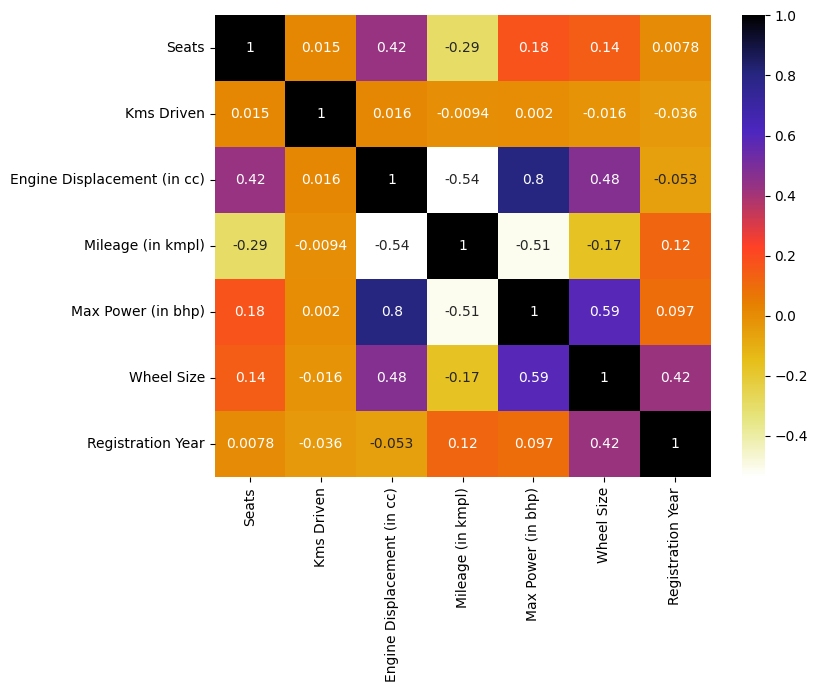

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = temp_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

__With the following function we can select highly correlated features. It will remove the first feature that is correlated with anything other feature__

- Here, threshold represents the percentage of correlation to be considered

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

80% of the threshold percentage of correlation is considered

In [ ]:
corr_features = correlation(temp_df, 0.8)
corr_features

{'Max Power (in bhp)'}

Max Power and Engine Displacement are highly correlated, thus using any one among them will be sufficient

In [ ]:
df.drop(corr_features, axis=1,inplace=True)

In [ ]:
df.columns

Index(['Brand', 'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven',
       'Ownership', 'Engine Displacement (in cc)', 'Transmission',
       'Mileage (in kmpl)', 'Wheel Size', 'Registration Month',
       'Registration Year', 'Price (in lacs)', 'City'],
      dtype='object')

__Univariate Analysis of Price__

In [ ]:
price = "Price (in lacs)"

(0.0, 100.0)

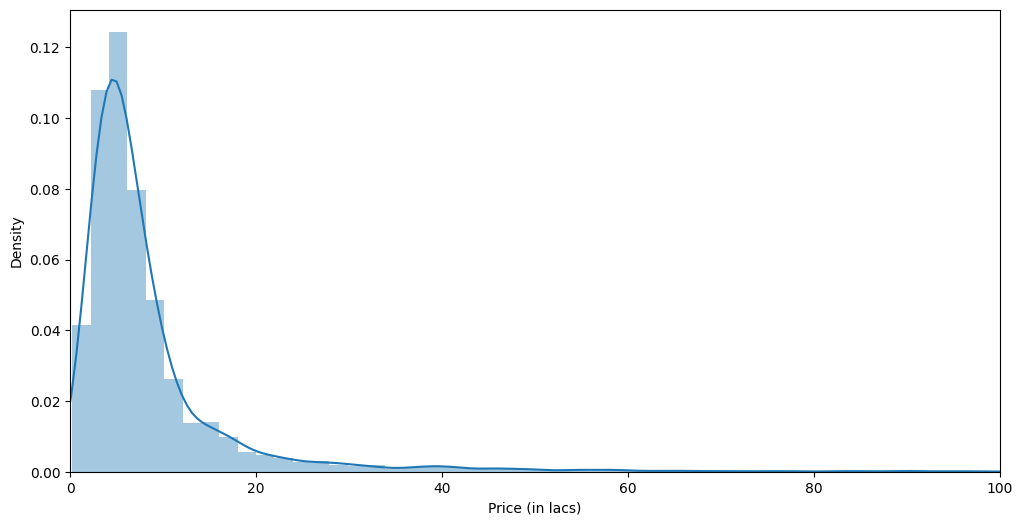

In [ ]:
f, ax = plt.subplots(figsize=(12,6))
sns.distplot(df[price], hist=True)
plt.xlim(0,100)

- It is observed that density of price ranges high between 0 and 12-15
- The curve is left skewed, although it is forming a Gaussian curve. This can be handled during standardisation

<Axes: xlabel='Fuel Type', ylabel='Price (in lacs)'>

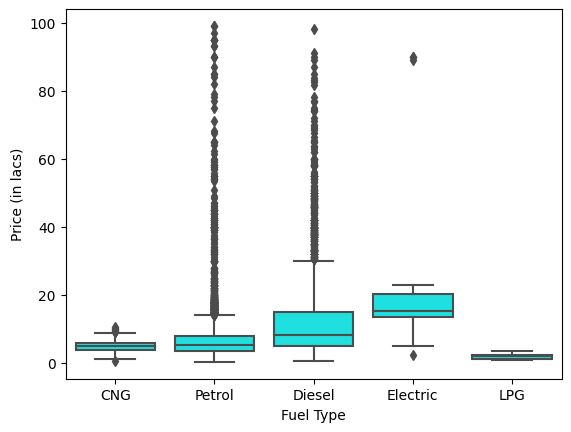

In [ ]:
sns.boxplot(x = "Fuel Type", y = price, data = df, color="cyan")

- It is observed that Diesel is the top in fuel type whereas LPG is the least
- It is also seen that Electric Vehicles are also emerging

<Axes: xlabel='Registration Year', ylabel='count'>

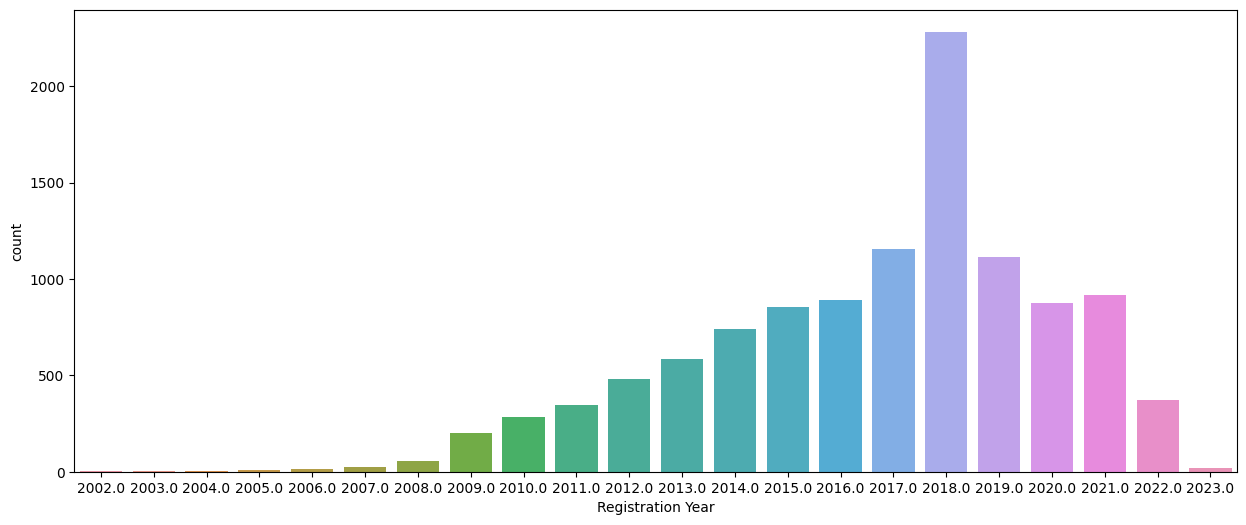

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Registration Year", data = df)

It is observed that most of the used cars are from the year 2018

<Axes: xlabel='Ownership', ylabel='Price (in lacs)'>

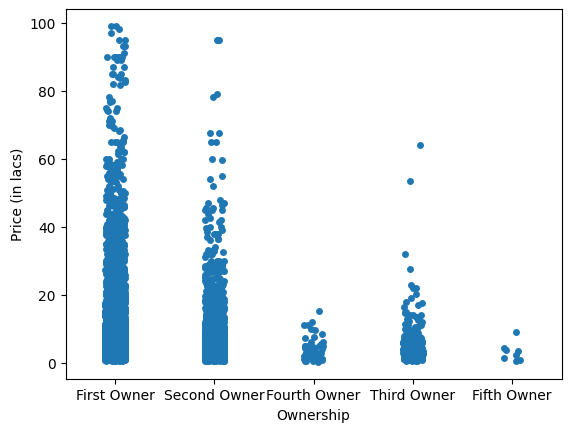

In [ ]:
f.set_size_inches(11.7, 8.27)
sns.stripplot(x = 'Ownership', y =price, data = df) 

It is observed that most of the owners of used cars are first and second

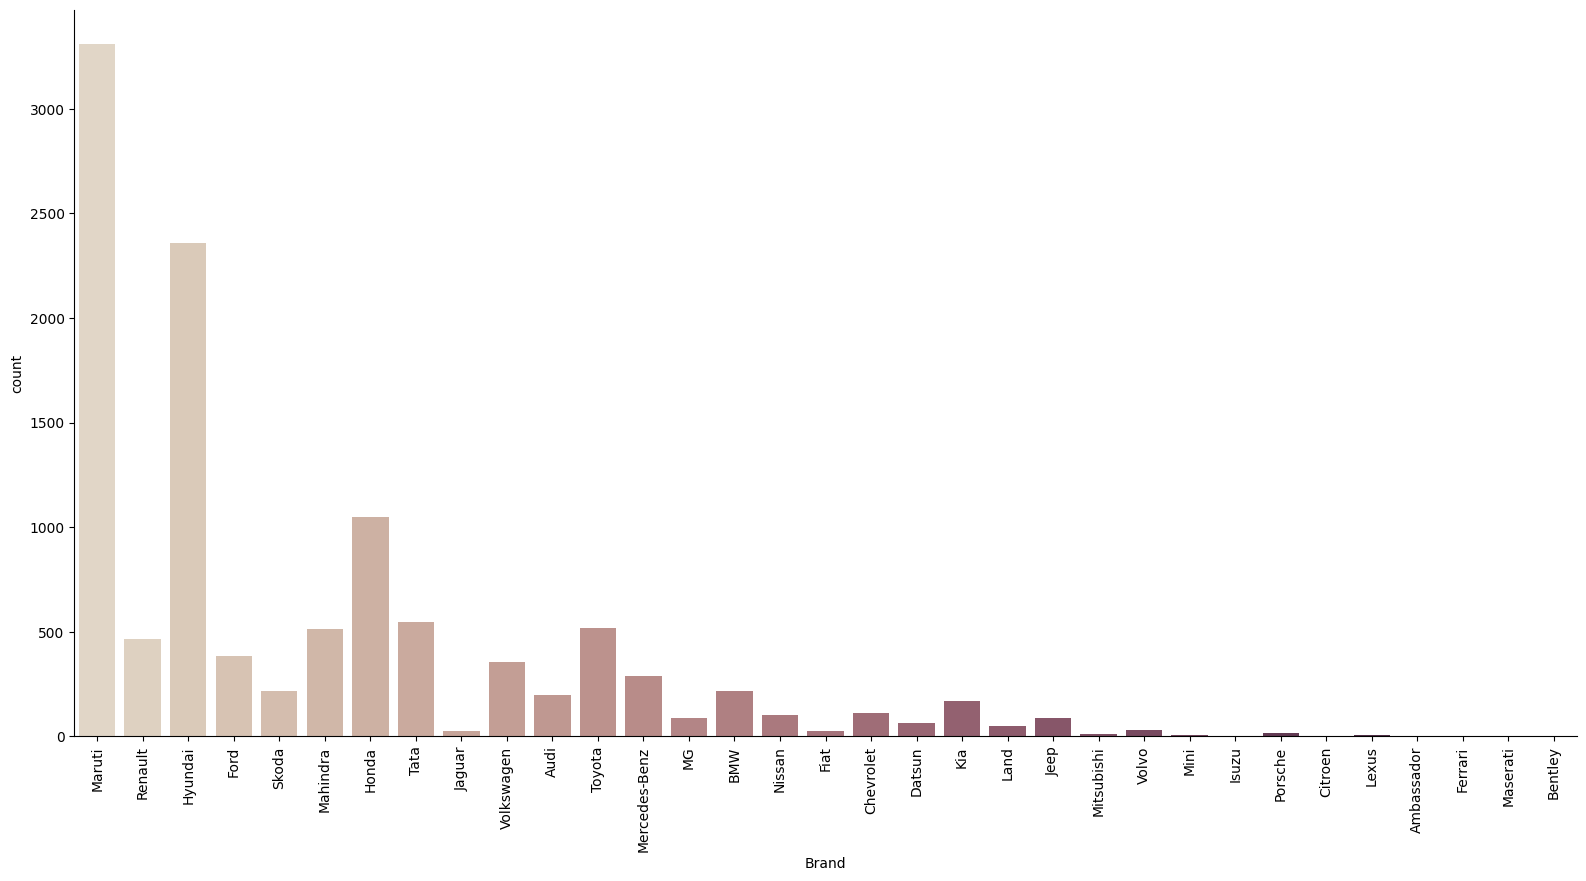

In [ ]:
sns.catplot(x="Brand", kind="count", palette="ch:.25", height=8, aspect=2, data=df)
plt.xticks(rotation=90);

It is observed that Maruti and Hyundai along with Mahindra are the brands people tend to purchase the used cars of

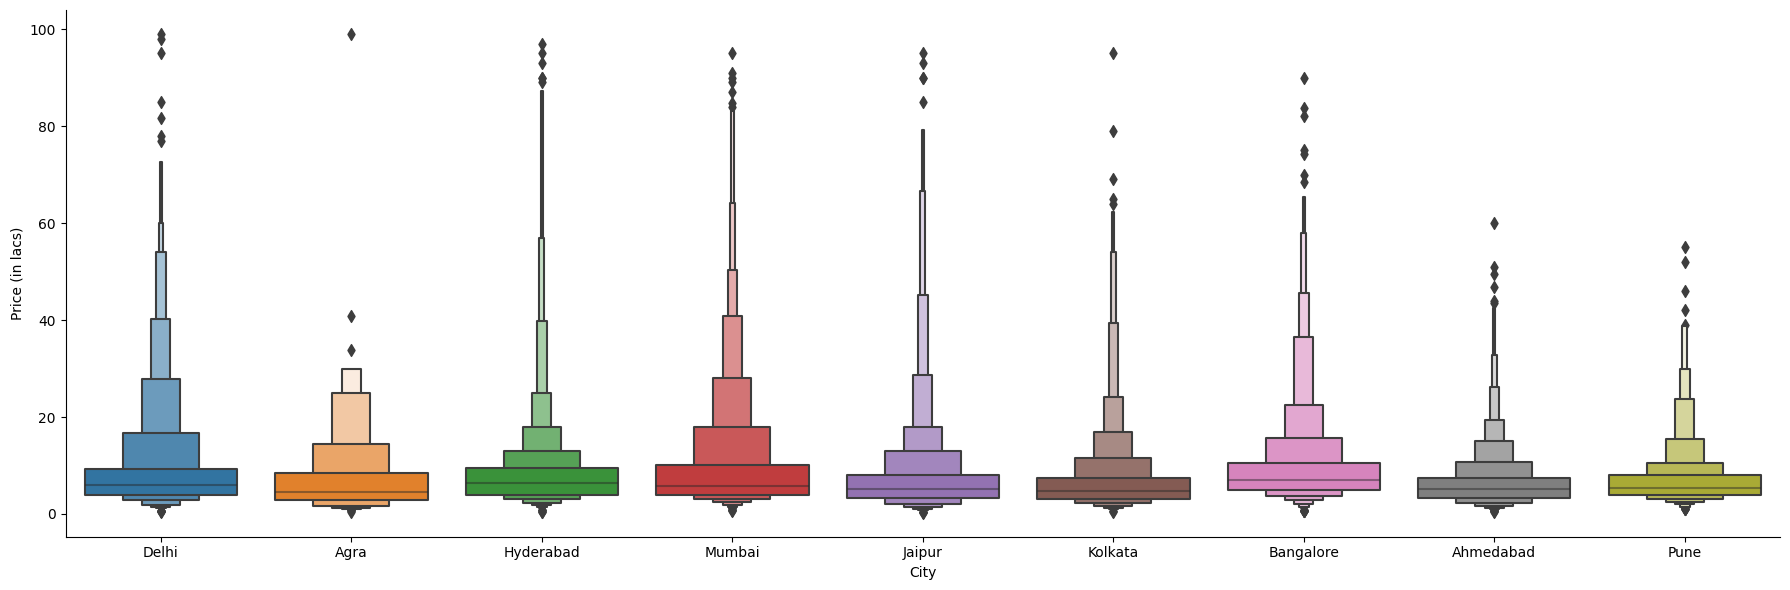

In [ ]:
sns.catplot(y=price,x='City',data= df.sort_values(price,ascending=False),kind="boxen",height=6, aspect=3)

It is observed that Agra, Ahemdabad and Pune has the low purchases of used cars

<Axes: xlabel='Registration Year', ylabel='Price (in lacs)'>

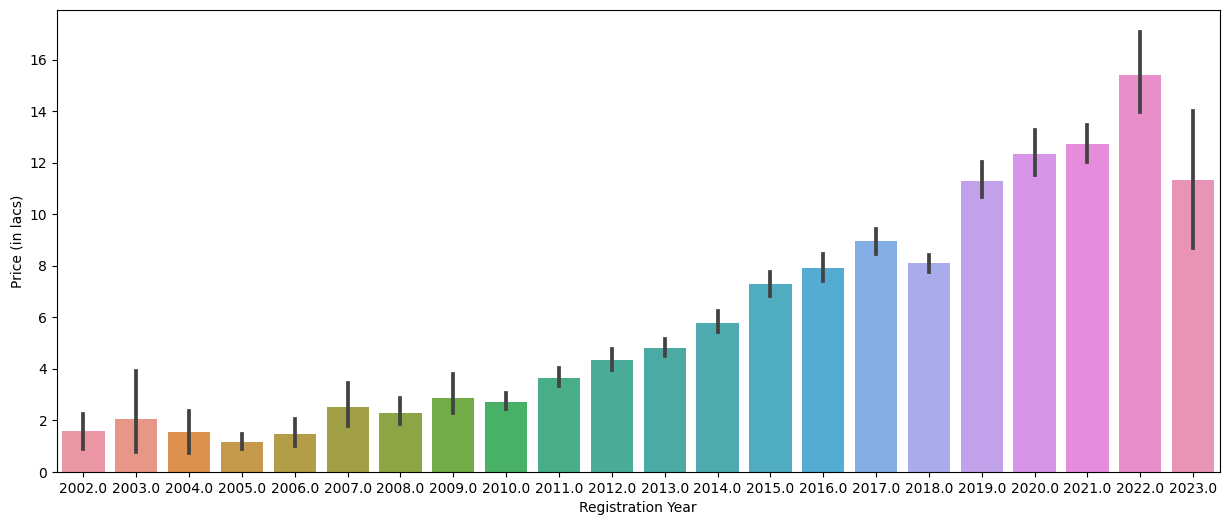

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Registration Year',y=price, data=df)

It is observed that as the age of the car increases, the price decreases

<Axes: xlabel='Insurance Validity', ylabel='count'>

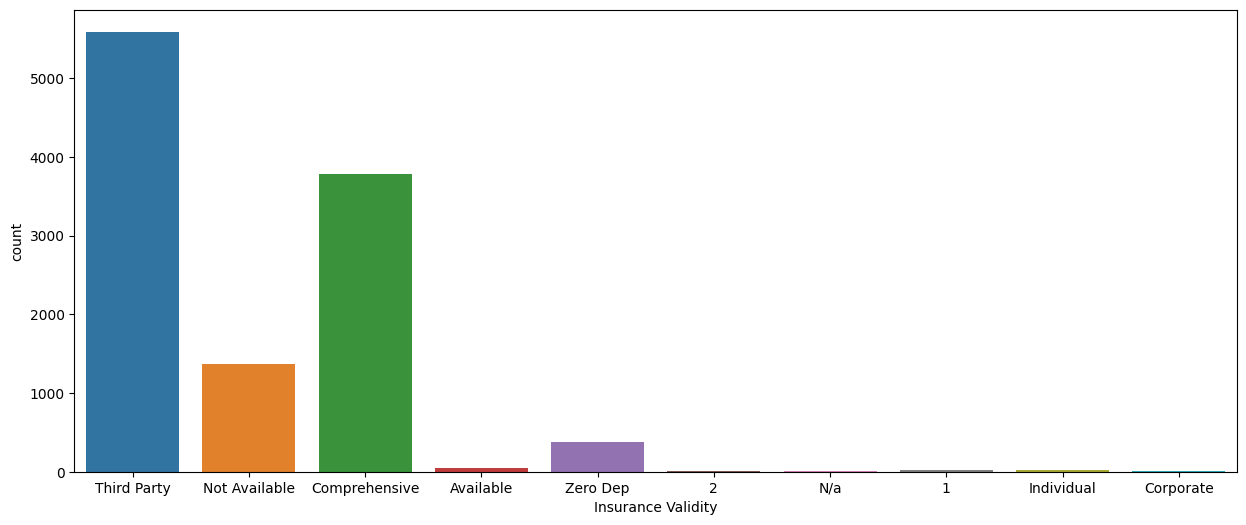

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="Insurance Validity", data = df)

- It is observed that most of the car has Third Party Insurance
- Thus combining the rest insurances into one category, say __"others"__ will be a good choice

<Axes: xlabel='Transmission', ylabel='Price (in lacs)'>

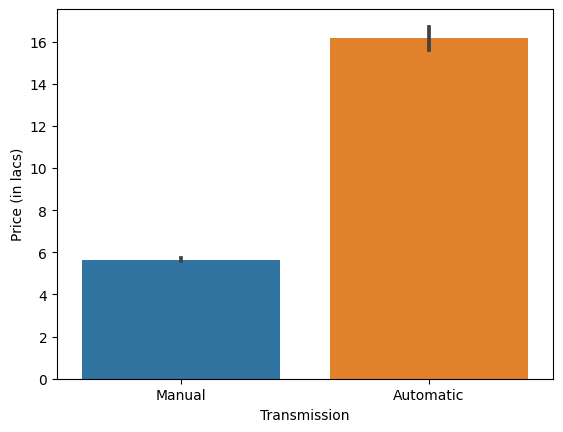

In [ ]:
sns.barplot(x='Transmission',y=price,data=df)

It is observed that most of the vehicle has automatic transmission

<Axes: xlabel='Wheel Size', ylabel='count'>

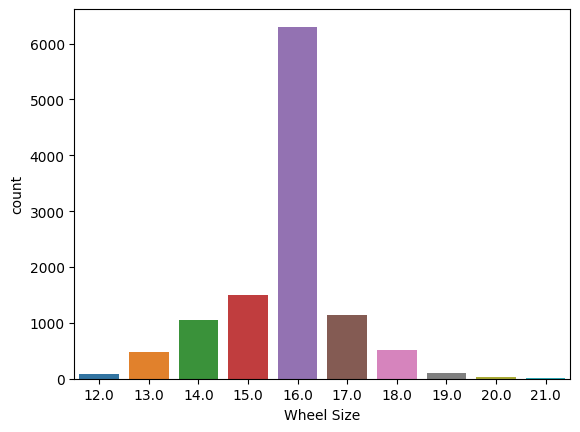

In [ ]:
sns.countplot(x="Wheel Size", data = df)

It is observed that most of the vehicles has 16 seats at max

#### 4. <u> DATA PREPROCESSING  </u>

In [ ]:
counts = df['Brand'].value_counts()
counts

Maruti           3308
Hyundai          2360
Honda            1049
Tata              545
Toyota            519
Mahindra          516
Renault           467
Ford              386
Volkswagen        355
Mercedes-Benz     289
Skoda             219
BMW               216
Audi              196
Kia               170
Chevrolet         110
Nissan            104
MG                 88
Jeep               87
Datsun             66
Land               52
Volvo              32
Fiat               27
Jaguar             24
Porsche            15
Mitsubishi         13
Mini                8
Lexus               5
Isuzu               3
Citroen             2
Bentley             2
Ambassador          1
Ferrari             1
Maserati            1
Name: Brand, dtype: int64

-  It is seen that most of the brand has value counts with lesser frequency
- Thus considering a threshold of 200 and putting them into others category

In [ ]:
threshold = 200

In [ ]:
replacement = counts[counts <= threshold].index
replacement

Index(['Audi', 'Kia', 'Chevrolet', 'Nissan', 'MG', 'Jeep', 'Datsun', 'Land',
       'Volvo', 'Fiat', 'Jaguar', 'Porsche', 'Mitsubishi', 'Mini', 'Lexus',
       'Isuzu', 'Citroen', 'Bentley', 'Ambassador', 'Ferrari', 'Maserati'],
      dtype='object')

In [ ]:
df['Brand'] = df['Brand'].apply(lambda feature : 'Others' if feature in replacement else feature)

In [ ]:
df['Brand'].value_counts()

Maruti           3308
Hyundai          2360
Honda            1049
Others           1007
Tata              545
Toyota            519
Mahindra          516
Renault           467
Ford              386
Volkswagen        355
Mercedes-Benz     289
Skoda             219
BMW               216
Name: Brand, dtype: int64

- Similarly doing it for insurance validity as the top 3 value counts has major frequency whereas the others are less
- Considering the threshold of 500

In [ ]:
counts = df['Insurance Validity'].value_counts()
counts

Third Party      5593
Comprehensive    3787
Not Available    1367
Zero Dep          374
Available          53
1                  23
Individual         20
N/a                 8
2                   7
Corporate           4
Name: Insurance Validity, dtype: int64

In [ ]:
threshold = 500

In [ ]:
replacement = counts[counts <= threshold].index
replacement

Index(['Zero Dep', 'Available', '1', 'Individual', 'N/a', '2', 'Corporate'], dtype='object')

In [ ]:
df['Insurance Validity'] = df['Insurance Validity'].apply(lambda feature : 'Others' if feature in replacement else feature)

In [ ]:
df['Insurance Validity'].value_counts()

Third Party      5593
Comprehensive    3787
Not Available    1367
Others            489
Name: Insurance Validity, dtype: int64

In [ ]:
counts = df['Ownership'].value_counts()
counts

First Owner     8474
Second Owner    2340
Third Owner      336
Fourth Owner      78
Fifth Owner        8
Name: Ownership, dtype: int64

- Similarly doing it for ownership as the bottom 3 value counts has lesser frequency
- Thus, converting bottom 3 into one category i.e., Third or More Owners with threshold less than 500

In [ ]:
replacement = counts[counts <= threshold].index
replacement

Index(['Third Owner', 'Fourth Owner', 'Fifth Owner'], dtype='object')

In [ ]:
df['Ownership'] = df['Ownership'].apply(lambda feature : 'Third or More Owners' if feature in replacement else feature)

In [ ]:
df['Ownership'].value_counts()

First Owner             8474
Second Owner            2340
Third or More Owners     422
Name: Ownership, dtype: int64

Plotting graph for registration year

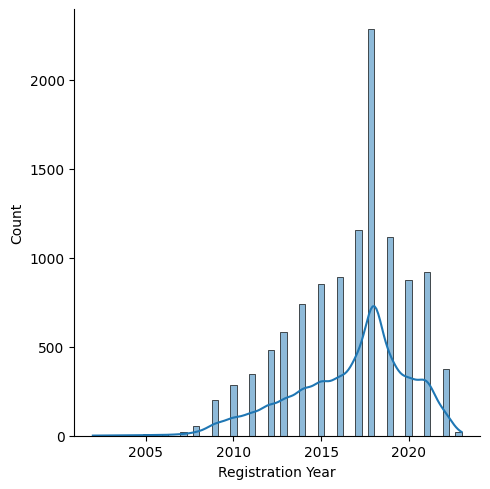

In [ ]:
sns.displot(x="Registration Year", data = df, kde = True)

From the above graph it is seen that cars with year less than 2010 has very few frequency. It acts as a outliers and may create noise. Thus removing it will be a good choice

In [ ]:
counts = df['Registration Year'].value_counts()
counts

2018.0    2283
2017.0    1157
2019.0    1116
2021.0     917
2016.0     890
2020.0     876
2015.0     855
2014.0     740
2013.0     583
2012.0     482
2022.0     373
2011.0     348
2010.0     285
2009.0     199
2008.0      56
2007.0      22
2023.0      21
2006.0      12
2005.0       9
2004.0       6
2003.0       4
2002.0       2
Name: Registration Year, dtype: int64

In [ ]:
df = df[df['Registration Year'] > 2010]

In [ ]:
df['Registration Year'].value_counts()

2018.0    2283
2017.0    1157
2019.0    1116
2021.0     917
2016.0     890
2020.0     876
2015.0     855
2014.0     740
2013.0     583
2012.0     482
2022.0     373
2011.0     348
2023.0      21
Name: Registration Year, dtype: int64

In [ ]:
df.shape

(10641, 14)

In [ ]:
df.to_csv('updated_car_data.csv',index=False)

# The work is now continued into another notebook